In [1]:
path=r"D:\Asus\Documents\timeseries_rev (1).csv"

In [2]:
import pandas as pd
from tensorflow.keras.layers import LSTM, Dense, Flatten
from tensorflow.keras.models import Sequential



In [3]:
import pandas as pd

In [4]:
file= pd.read_csv(path)

In [5]:
file.head(10)

,Unnamed: 0,week,year,date,total_revenue
0,96,49,2009,2009-12-01,232177.510
1,99,50,2009,2009-12-07,207908.730
2,101,51,2009,2009-12-14,207685.870
3,103,52,2009,2009-12-21,35731.900
4,0,1,2010,2010-01-04,167636.950
5,2,2,2010,2010-01-11,125493.610
6,4,3,2010,2010-01-18,119473.351
7,6,4,2010,2010-01-25,143198.761
8,8,5,2010,2010-02-01,112299.692
9,10,6,2010,2010-02-08,80059.660


In [6]:
file.describe()

,Unnamed: 0,week,year,total_revenue
count,104.000000,104.000000,104.000000,104.000000
mean,51.500000,26.471154,2010.432692,167065.425654
std,30.166206,15.034560,0.570546,62661.386497
min,0.000000,1.000000,2009.000000,35731.900000
25%,25.750000,13.750000,2010.000000,124140.957500
50%,51.500000,26.500000,2010.000000,150624.091000
75%,77.250000,39.250000,2011.000000,201107.020000
max,103.000000,52.000000,2011.000000,408044.970000


In [7]:
file.shape

(104, 5)

In [8]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     104 non-null    int64  
 1   week           104 non-null    int64  
 2   year           104 non-null    int64  
 3   date           104 non-null    object 
 4   total_revenue  104 non-null    float64
dtypes: float64(1), int64(3), object(1)
memory usage: 4.2+ KB


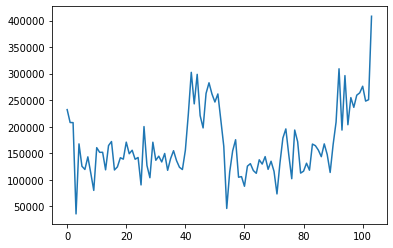

In [9]:
import matplotlib.pyplot as plt
plt.plot(file['total_revenue'].values)

In [10]:
input= []
output=[]

In [11]:
file1= file['total_revenue'].values

In [12]:
type(file1)

numpy.ndarray

In [13]:
file2=file1.tolist()

In [14]:
len(file2)

104

In [15]:
n_steps= 10

for i in range(0,len(file2)):
    next= i+n_steps
    if next >= len(file2):
        break
    xx= (file2)[i:next]
    input.append(xx)
    print(next)
    output.append(file2[next])

10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103


In [16]:
xx

[193654.4309999985,
 296214.2400000022,
 203708.95000000004,
 254775.57000000097,
 236456.8400000005,
 259374.02000000008,
 263717.33000000083,
 276216.9800000018,
 248234.58000000165,
 250833.04000000143]

In [17]:
file2[-4:-1]

[276216.9800000018, 248234.58000000165, 250833.04000000143]

In [18]:
input

[[232177.5100000049,
  207908.73000000304,
  207685.8700000016,
  35731.90000000003,
  167636.95000000086,
  125493.60999999892,
  119473.3509999989,
  143198.761,
  112299.69199999892,
  80059.6599999995],
 [207908.73000000304,
  207685.8700000016,
  35731.90000000003,
  167636.95000000086,
  125493.60999999892,
  119473.3509999989,
  143198.761,
  112299.69199999892,
  80059.6599999995,
  160506.4020000012],
 [207685.8700000016,
  35731.90000000003,
  167636.95000000086,
  125493.60999999892,
  119473.3509999989,
  143198.761,
  112299.69199999892,
  80059.6599999995,
  160506.4020000012,
  151693.20200000104],
 [35731.90000000003,
  167636.95000000086,
  125493.60999999892,
  119473.3509999989,
  143198.761,
  112299.69199999892,
  80059.6599999995,
  160506.4020000012,
  151693.20200000104,
  151813.96000000116],
 [167636.95000000086,
  125493.60999999892,
  119473.3509999989,
  143198.761,
  112299.69199999892,
  80059.6599999995,
  160506.4020000012,
  151693.20200000104,
  15181

In [19]:
output

[160506.4020000012,
 151693.20200000104,
 151813.96000000116,
 118785.09999999891,
 164459.77100000027,
 172063.68000000075,
 118502.61999999962,
 124314.75999999935,
 141539.38099999944,
 138922.6199999997,
 170900.75100000002,
 149102.8300000001,
 155673.5400000018,
 138681.5699999983,
 142033.26999999874,
 90358.0599999986,
 200239.71000000244,
 126987.38999999833,
 103924.8399999986,
 170793.5700000008,
 136775.1199999993,
 144495.57999999897,
 133615.99999999854,
 149554.97999999835,
 117866.3699999983,
 139842.0699999989,
 154786.9100000003,
 136279.5499999991,
 123619.54999999938,
 119333.9399999982,
 155778.92099999948,
 223587.0400000029,
 302392.6600000099,
 243007.44000000457,
 298614.0400000073,
 220882.67000000464,
 197721.45000000208,
 262597.86000000814,
 282707.7010000081,
 261610.06100000872,
 246492.99000000808,
 261679.38000000807,
 212619.13000000297,
 163116.12000000078,
 46059.51000000002,
 114636.7999999984,
 154344.84999999995,
 175452.23000000062,
 104860.99999

In [26]:
import numpy as np

In [27]:
input_array=np.asarray(input)

In [28]:
input_array.shape

(94, 10)

In [29]:
output_array= np.asarray(output)
output_array=output_array.reshape([output_array.shape[0],1])

In [30]:
output_array[:4]

array([[160506.402],
       [151693.202],
       [151813.96 ],
       [118785.1  ]])

In [32]:
# input_array=input_array.reshape([input_array.shape[0],1])
# input_array.shape

In [33]:
output_array.shape

(94, 1)

In [34]:
reshaped_input=input_array.reshape([input_array.shape[0],input_array.shape[1],1])

In [35]:
reshaped_input.shape

(94, 10, 1)

In [36]:
model = Sequential()
model.add(LSTM(50, activation='relu', return_sequences=True, input_shape=(n_steps, 1)))
model.add(LSTM(50, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(input, output, epochs=300, verbose=1)

Epoch 1/300
3/3 [==============================] - 6s 19ms/step - loss: 24469770240.0000
Epoch 2/300
3/3 [==============================] - 0s 18ms/step - loss: 19922827264.0000
Epoch 3/300
3/3 [==============================] - 0s 19ms/step - loss: 17555273728.0000
Epoch 4/300
3/3 [==============================] - 0s 20ms/step - loss: 15736241152.0000
Epoch 5/300
3/3 [==============================] - 0s 21ms/step - loss: 14575287296.0000
Epoch 6/300
3/3 [==============================] - 0s 19ms/step - loss: 13378184192.0000
Epoch 7/300
3/3 [==============================] - 0s 18ms/step - loss: 12544690176.0000
Epoch 8/300
3/3 [==============================] - 0s 21ms/step - loss: 12038960128.0000
Epoch 9/300
3/3 [==============================] - 0s 18ms/step - loss: 10786505728.0000
Epoch 10/300
3/3 [==============================] - 0s 19ms/step - loss: 10437527552.0000
Epoch 11/300
3/3 [==============================] - 0s 19ms/step - loss: 10080821248.0000
Epoch 12/300
3/3 [=

In [37]:
output[-4:-1]

[276216.9800000018, 248234.58000000165, 250833.04000000143]

In [39]:
output[-11:-1]

[193654.4309999985,
 296214.2400000022,
 203708.95000000004,
 254775.57000000097,
 236456.8400000005,
 259374.02000000008,
 263717.33000000083,
 276216.9800000018,
 248234.58000000165,
 250833.04000000143]

In [41]:
# demonstrate prediction for next 10 days
x_input = output[-11:]
temp_input=list(x_input)
lst_output=[]
i=0
n_features=1
while(i<10):
    
    
    if(len(temp_input)>3):
        x_input=np.array(temp_input[1:])
        print("{} day input {}".format(i,x_input))
        #print(x_input)
        x_input = x_input.reshape((1, n_steps, n_features))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        print("{} day output {}".format(i,yhat))
        temp_input.append(yhat[0][0])
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.append(yhat[0][0])
        i=i+1
    else:
        x_input = x_input.reshape((1, n_steps, n_features))
        yhat = model.predict(x_input, verbose=0)
        print(yhat[0])
        temp_input.append(yhat[0][0])
        lst_output.append(yhat[0][0])
        i=i+1
    

print(lst_output)


0 day input [296214.24 203708.95 254775.57 236456.84 259374.02 263717.33 276216.98
 248234.58 250833.04 408044.97]
0 day output [[290027.44]]
1 day input [203708.95   254775.57   236456.84   259374.02   263717.33   276216.98
 248234.58   250833.04   408044.97   290027.4375]
1 day output [[291642.3]]
2 day input [254775.57   236456.84   259374.02   263717.33   276216.98   248234.58
 250833.04   408044.97   290027.4375 291642.3125]
2 day output [[298593.38]]
3 day input [236456.84   259374.02   263717.33   276216.98   248234.58   250833.04
 408044.97   290027.4375 291642.3125 298593.375 ]
3 day output [[305370.16]]
4 day input [259374.02    263717.33    276216.98    248234.58    250833.04
 408044.97    290027.4375  291642.3125  298593.375   305370.15625]
4 day output [[313910.2]]
5 day input [263717.33    276216.98    248234.58    250833.04    408044.97
 290027.4375  291642.3125  298593.375   305370.15625 313910.1875 ]
5 day output [[325679.78]]
6 day input [276216.98    248234.58    250

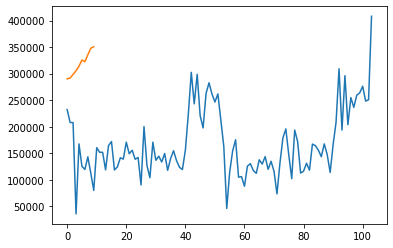

In [42]:
plt.plot(file1)
plt.plot(lst_output)